## Basic Neural Network



### Import libraries

In [747]:
#import libraries
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

%matplotlib inline

### Create Training Data

In [768]:
# Generate Samle Points

IN_binary =  [[0, 0, 0, 0],    #0
              [0, 0, 0, 1],    #1
              [0, 0, 1, 0],    #2
              [0, 0, 1, 1],    #3
              [0, 1, 0, 0],    #4
              [0, 1, 0, 1],    #5
              [0, 1, 1, 0],    #6
              [0, 1, 1, 1],    #7
              [1, 0, 0, 0],    #8
              [1, 0, 0, 1],    #9
              [1, 0, 1, 0],    #10
              [1, 0, 1, 1],    #11
              [1, 1, 0, 0],    #12
              [1, 1, 0, 1],    #13
              [1, 1, 1, 0],    #14
              [1, 1, 1, 1]]    #15
             
#              0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15,    
OUT_dec =    [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]
              




In [769]:
#Network Parameters
INPUTS = 4
HIDDEN_1 = 20
OUTPUTS = 16

#Hyper Parameters
learning_rate = 0.1


In [770]:
#Use placeholders to pass our input and output data into the system
x_data = tf.placeholder(dtype=tf.float32,shape=[None, INPUTS],name="input")
y_data = tf.placeholder(dtype=tf.float32,shape=[None, OUTPUTS],name="output")

In [771]:
#input to hidden
weight1 = tf.random_normal([INPUTS, HIDDEN_1], mean=0.5, stddev=0.7)
weight1 = tf.Variable(weight1, name='W1')

bias1 = tf.random_normal([HIDDEN_1], mean=0.5, stddev=0.7)
bias1 = tf.Variable(bias1, name='B1')

weight2 = tf.random_normal([HIDDEN_1, OUTPUTS], mean=0.5, stddev=0.7)
weight2 = tf.Variable(weight2, name='W2')

bias2 = tf.random_normal([OUTPUTS], mean=0.5, stddev=0.7)
bias2 = tf.Variable(bias2, name='B2')

In [772]:


#input to hidden
hidden1 = tf.nn.relu(tf.matmul(x_data, weight1) + bias1)

#hidden to output
y = tf.matmul(hidden1, weight2) + bias2


In [773]:
#apply final activation
result = tf.nn.softmax(y)


In [774]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_data))

optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [775]:
init = tf.global_variables_initializer()
session = tf.Session(config=tf.ConfigProto(log_device_placement=True))
session.run(init)

In [777]:
epochs = 2000
display_epochs = 100

for step in range(epochs):
    output = session.run([train,loss],feed_dict={x_data: IN_binary, y_data: OUT_dec})
    if step % display_epochs == 0:
        print("Step: %d error: %g "%(step,output[1]))
    if output[1] <0.05:
        print("Step: %d error: %g "%(step,output[1]))
        break


Step: 0 error: 0.0400896 
Step: 0 error: 0.0400896 


0 with softmax


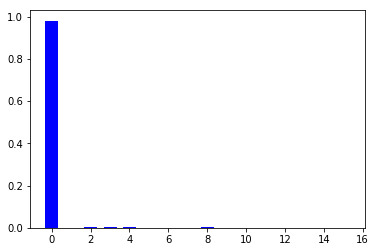

0 without softmax


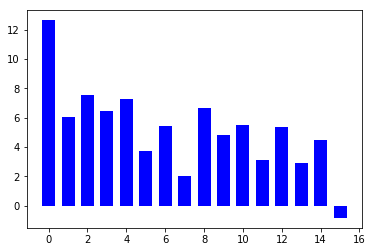

1


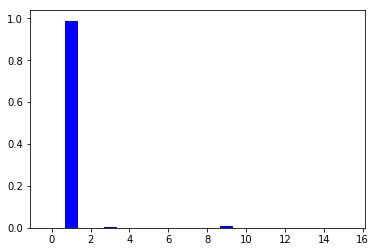

2


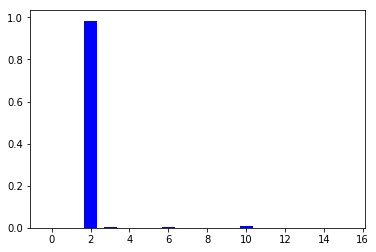

3


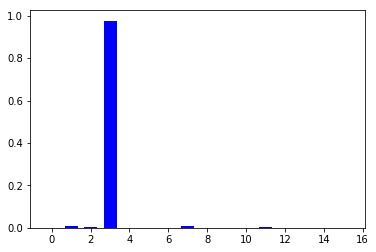

4


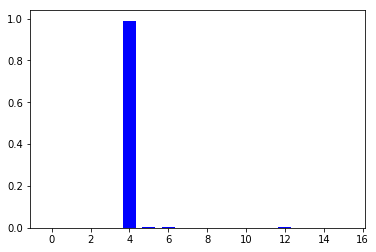

5


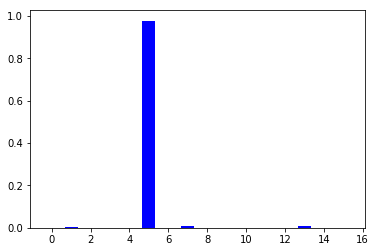

6


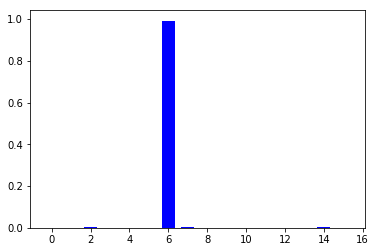

7


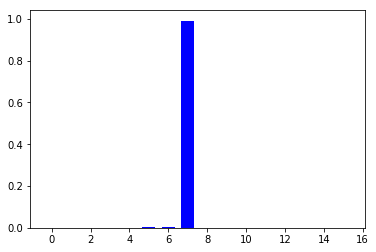

8


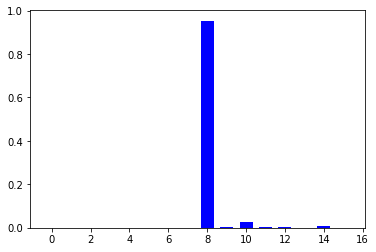

9


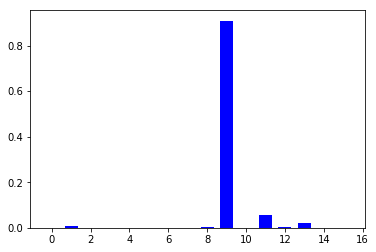

10


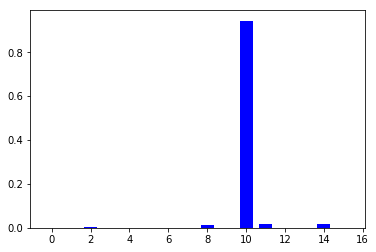

11


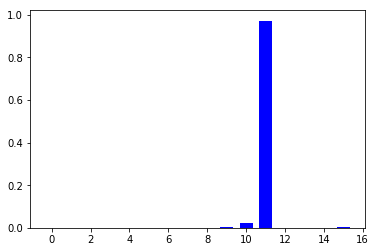

12


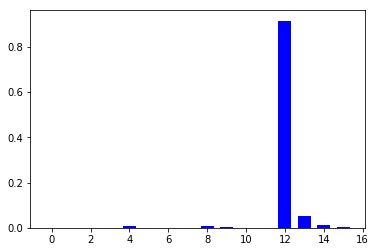

13


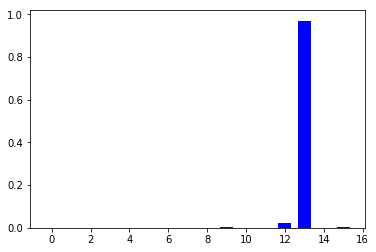

14


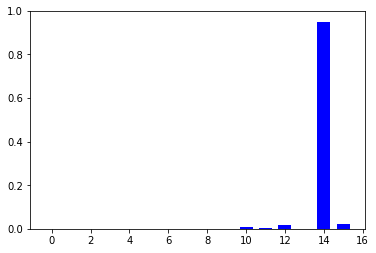

15


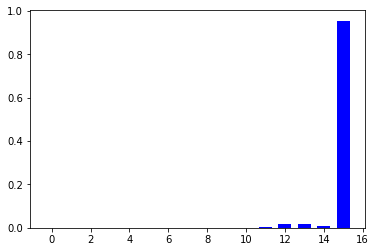

In [779]:
def bar_graph(label,res):
    print(label)
    y = res[0]
    N = len(y)
    x = range(N)
    width = 1/1.5
    plt.bar(x, y, width, color="blue")
    plt.show()


#Test outputs
bar_graph("0 with softmax",session.run(result, feed_dict={x_data: [[ 0, 0, 0, 0]]}))
bar_graph("0 without softmax",session.run(y, feed_dict={x_data: [[ 0, 0, 0, 0]]}))#

bar_graph("1",session.run(result, feed_dict={x_data: [[ 0, 0, 0, 1]]}))
bar_graph("2",session.run(result, feed_dict={x_data: [[ 0, 0, 1, 0]]}))
bar_graph("3",session.run(result, feed_dict={x_data: [[ 0, 0, 1, 1]]}))
bar_graph("4",session.run(result, feed_dict={x_data: [[ 0, 1, 0, 0]]}))
bar_graph("5",session.run(result, feed_dict={x_data: [[ 0, 1, 0, 1]]}))
bar_graph("6",session.run(result, feed_dict={x_data: [[ 0, 1, 1, 0]]}))
bar_graph("7",session.run(result, feed_dict={x_data: [[ 0, 1, 1, 1]]}))
bar_graph("8",session.run(result, feed_dict={x_data: [[ 1, 0, 0, 0]]}))
bar_graph("9",session.run(result, feed_dict={x_data: [[ 1, 0, 0, 1]]}))
bar_graph("10",session.run(result, feed_dict={x_data: [[ 1, 0, 1, 0]]}))
bar_graph("11",session.run(result, feed_dict={x_data: [[ 1, 0, 1, 1]]}))
bar_graph("12",session.run(result, feed_dict={x_data: [[ 1, 1, 0, 0]]}))
bar_graph("13",session.run(result, feed_dict={x_data: [[ 1, 1, 0, 1]]}))
bar_graph("14",session.run(result, feed_dict={x_data: [[ 1, 1, 1, 0]]}))
bar_graph("15",session.run(result, feed_dict={x_data: [[ 1, 1, 1, 1]]}))


### Plot output

1


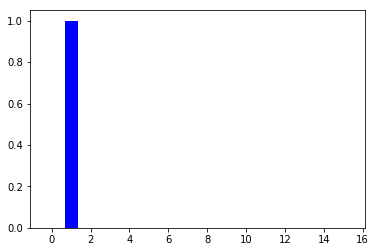

In [682]:
#Test outputs
bar_graph("1",session.run(result, feed_dict={x_data: [[ 0, 0, 0, 1]]}))


2


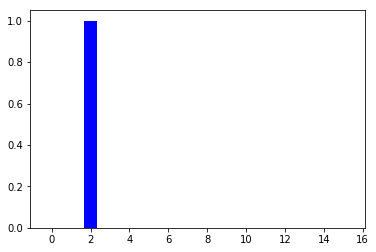

In [683]:

bar_graph("2",session.run(result, feed_dict={x_data: [[ 0, 0, 1, 0]]}))


3


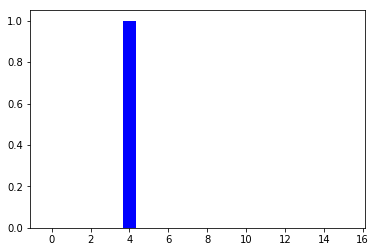

In [684]:

bar_graph("3",session.run(result, feed_dict={x_data: [[ 0, 1, 0, 0]]}))


In [685]:
session.close()